In [18]:
!pip install Avpy

  Created wheel for Avpy: filename=Avpy-0.1.3-cp37-none-any.whl size=106853 sha256=ae9863fc2cb12250761d34021c39555ef6dcf7581dd6ad40ef735e5cdfcf08bd
  Stored in directory: C:\Users\Rahul V Hegde\AppData\Local\pip\Cache\wheels\7a\53\b9\919a80c29b516914b28cde442eb74859507f3b135918c4b72c
Successfully built Avpy


In [49]:
!pip install --upgrade librosa

Requirement already up-to-date: librosa in d:\anaconda\lib\site-packages (0.7.2)


In [3]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import os
import IPython as ip
from pathlib import Path
import librosa
from tensorflow.keras.callbacks import TensorBoard

In [4]:
path=r'./Gender_Data_Michigan/'

In [5]:
dirs=os.listdir(path)
dirs

['adult', 'child']

In [6]:
audio_adult=os.listdir(path+dirs[0])
audio_child=os.listdir(path+dirs[1])

In [7]:
paths_adult=[]
for i in audio_adult:
    paths_adult.append(path+'/adult/'+i)

In [8]:
paths_child=[]
for i in audio_child:
    paths_child.append(path+'child/'+i)

In [7]:
print(paths_child[0])

./Gender_Data_Michigan/child/b01ae.wav


In [8]:
ip.display.Audio(paths_child[0])

In [9]:
ip.display.Audio(paths_adult[0])

In [ ]:
os.mkdir('./spectogram_adult/')
os.mkdir('./spectogram_child/')

In [28]:
import os
import wave
spectogram_path=Path('./spectogram_adult/')
import pylab
def graph_spectrogram_adult(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    #pylab.figure(num=None, figsize=(19, 12))
    #pylab.subplot(111)
    #pylab.title('spectrogram of %r' % wav_file)
    _=pylab.specgram(sound_info, Fs=frame_rate)
    filename=spectogram_path/Path(wav_file).name.replace('.wav','.png')
    pylab.savefig(filename)
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'Int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [ ]:
for i in paths_adult:
    graph_spectrogram_adult(i)

In [ ]:
spectogram_path=Path('./spectogram_child/')
def graph_spectrogram_child(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    #pylab.figure(num=None, figsize=(19, 12))
    #pylab.subplot(111)
    #pylab.title('spectrogram of %r' % wav_file)
    _=pylab.specgram(sound_info, Fs=frame_rate)
    filename=spectogram_path/Path(wav_file).name.replace('.wav','.png')
    pylab.savefig(filename)

In [ ]:
for i in paths_child:
    graph_spectrogram_child(i)

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2    
from tqdm import tqdm
import random as random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [10]:
adult='./spectogram_adult/'
children='./spectogram_child/'

In [11]:
img_size=150
predicters=[]
target=[]

In [12]:
def read_image(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path=os.path.join(DIR,img)
        image=cv2.imread(path,cv2.IMREAD_COLOR)
        image=cv2.resize(image,(img_size,img_size))
        predicters.append(np.array(image))
        target.append(str(label))
read_image("adult",adult)
read_image("child",children)
        

100%|██████████| 553/553 [00:07<00:00, 69.65it/s]


In [13]:
len(predicters),len(target)


(1585, 1585)

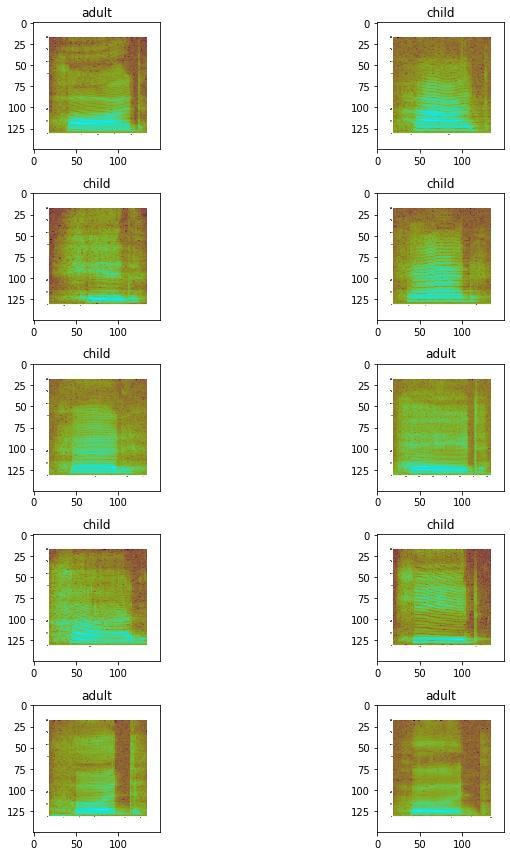

In [28]:
fig,ax = plt.subplots(5,2)
fig.set_size_inches(12,12)

for i in range(5):
    for j in range(2):
        l = random.randint(0,len(target))
        ax[i,j].imshow(predicters[l])
        ax[i,j].set_title(target[l])
        
plt.tight_layout()

In [14]:
encoder = LabelEncoder()

X = np.array(predicters)
X = X/255

y = encoder.fit_transform(target)
y = to_categorical(y,2)

print(X.shape)
print(y.shape)

(1585, 150, 150, 3)
(1585, 2)


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.1,random_state=42)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((1268, 150, 150, 3),
 (1268, 2),
 (32, 150, 150, 3),
 (32, 2),
 (285, 150, 150, 3),
 (285, 2))

In [25]:
batch_size = 64
epochs = 20
num_classes = y.shape[1]
import time
tensorboard=TensorBoard(log_dir='.\\logs\\{}'.format(time.time()))

In [18]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(img_size,img_size,3)))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
conv2d_1 (Conv2D)            (None, 150, 150, 64)      1792
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 128)       0
_________________________________________________________________
batch_normalization_2 (Batch (None, 38, 38, 128)       512
___________________________________________

In [19]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [26]:
model.fit(X_train,y_train,epochs=20,verbose=2,callbacks=[tensorboard])

Epoch 1/20
 - 67s - loss: 0.6970 - accuracy: 0.7224
Epoch 2/20
 - 65s - loss: 0.4469 - accuracy: 0.8155
Epoch 3/20
 - 65s - loss: 0.3451 - accuracy: 0.8636
Epoch 4/20
 - 65s - loss: 0.3149 - accuracy: 0.8659
Epoch 5/20
 - 69s - loss: 0.2547 - accuracy: 0.8959
Epoch 6/20
 - 71s - loss: 0.2247 - accuracy: 0.9101
Epoch 7/20
 - 70s - loss: 0.2104 - accuracy: 0.9227
Epoch 8/20
 - 72s - loss: 0.1766 - accuracy: 0.9322
Epoch 9/20
 - 69s - loss: 0.1597 - accuracy: 0.9298
Epoch 10/20
 - 68s - loss: 0.1866 - accuracy: 0.9211
Epoch 11/20
 - 68s - loss: 0.1320 - accuracy: 0.9503
Epoch 12/20
 - 71s - loss: 0.1595 - accuracy: 0.9409
Epoch 13/20
 - 68s - loss: 0.1287 - accuracy: 0.9527
Epoch 14/20
 - 68s - loss: 0.1615 - accuracy: 0.9424
Epoch 15/20
 - 65s - loss: 0.1182 - accuracy: 0.9558
Epoch 16/20
 - 61s - loss: 0.1451 - accuracy: 0.9448
Epoch 17/20
 - 61s - loss: 0.1043 - accuracy: 0.9645
Epoch 18/20
 - 61s - loss: 0.1045 - accuracy: 0.9598
Epoch 19/20
 - 61s - loss: 0.0980 - accuracy: 0.9606
Ep

In [29]:
model.save('./model.h5')

In [16]:
model.load_weights('./model.h5')

In [27]:
loss,acc=model.evaluate(X_test,y_test)

32/285 [==>...........................] - ETA: 64/285 [=====>........................] - ETA: 96/285 [=========>....................] - ETA:128/285 [============>.................] - ETA:160/285 [===============>..............] - ETA:192/285 [===================>..........] - ETA:224/285 [======================>.......] - ETA:256/285 [=========================>....] - ETA:285/285 [==============================] - 4s 15ms/step


In [28]:
acc

0.9263157844543457

In [17]:
pred=model.predict(X_test)

In [21]:
l=["adult","child"]
for i in pred:
    print(l[np.argmax(i)])

child
child
adult
adult
adult
adult
adult
child
adult
adult
child
adult
adult
adult
child
child
adult
adult
adult
adult
child
child
child
child
child
child
adult
child
adult
child
child
adult
child
child
child
child
child
child
child
adult
adult
child
child
adult
child
adult
child
child
child
adult
child
child
child
child
child
adult
child
adult
child
adult
adult
adult
adult
child
adult
child
adult
adult
child
child
adult
child
adult
adult
child
child
child
child
child
adult
child
child
adult
adult
child
adult
child
child
adult
adult
child
child
child
adult
child
child
child
adult
adult
adult
child
adult
child
child
child
adult
adult
adult
child
child
child
child
child
child
child
child
child
child
child
adult
child
child
child
child
child
child
child
child
child
adult
adult
child
adult
adult
adult
child
adult
adult
adult
adult
adult
adult
child
child
child
adult
child
adult
adult
adult
child
adult
adult
child
child
adult
child
child
adult
child
child
child
adult
adult
adult
child
chil